In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [2]:
Athens_Data = pd.read_csv('Athens_data.csv', index_col=0)

In [3]:
#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Athens_Data = Athens_Data.loc[:, Athens_Data.columns.intersection(cols)]
Athens_Data = Athens_Data.apply(pd.to_numeric, errors='coerce')

Athens_Data = Athens_Data.fillna(method='ffill')
Athens_Data = Athens_Data.fillna(method='bfill')

In [4]:
print("Athens:\n" + str(Athens_Data.isna().sum()))

Athens:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Athens_Data is stationary :")
for col in Athens_Data.columns:
    result = adfuller(Athens_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Athens_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.185124
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000001


**A stationary series is one in which the properties — mean, variance and covariance, do not vary with time.**

FINDING OPTIMAL PARAMETERS FOR no2
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-708.156, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-447.452, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-708.316, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-649.978, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=543.749, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-706.467, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-706.506, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-706.985, Time=0.66 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-580.990, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.263 seconds
auto-ARIMA MSE for Athens[no2]:0.03291267425924069
auto-ARIMA RMSE for Athens[no2]:0.1814185058345501
auto-ARIMA MAE for Athens[no2]:0.14480610477104944


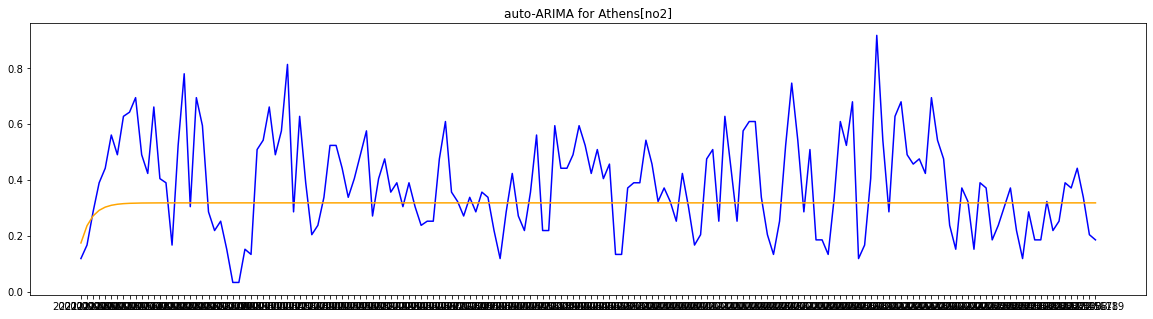

FINDING OPTIMAL PARAMETERS FOR o3
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1289.354, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1156.451, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1219.105, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1257.573, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1158.447, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1292.752, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1277.968, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1291.924, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1288.021, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1285.073, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1292.324, Time=0.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1288.814, Time=0.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1294.469, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1279.890,

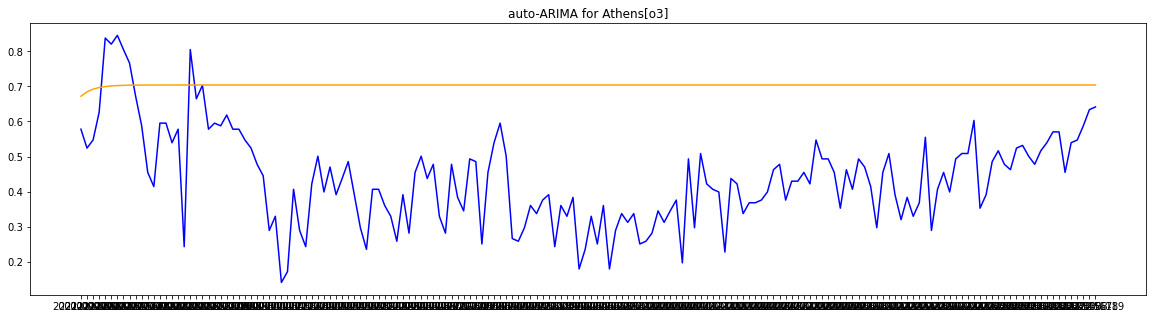

FINDING OPTIMAL PARAMETERS FOR pm10
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-993.193, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-529.620, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-985.834, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-877.814, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=445.849, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-995.130, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-956.250, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-995.238, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-994.482, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-993.039, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-901.356, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.968 seconds
auto-ARIMA MSE for Athens[pm10]:0.019358346904329308
auto-ARIMA RMSE for Athens[pm10]:0.13913427652569768
auto-ARIMA MA

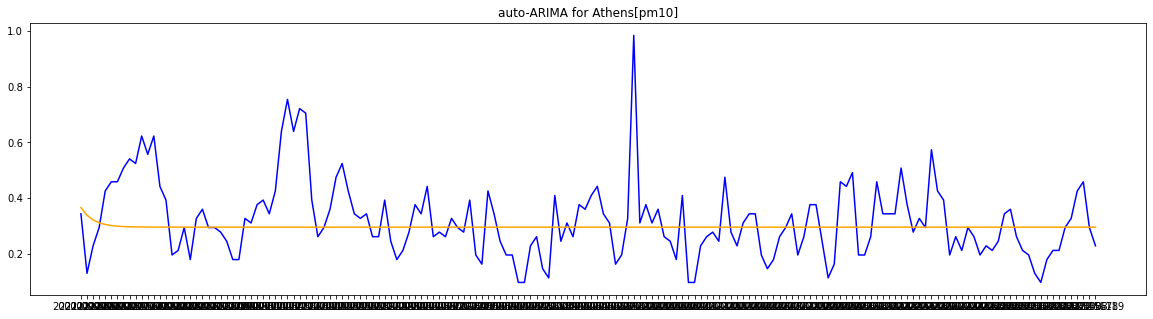

FINDING OPTIMAL PARAMETERS FOR pm25
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1211.484, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-804.612, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1210.631, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1112.158, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=508.344, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1213.414, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1190.231, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1215.397, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1213.405, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1215.039, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1108.623, Time=0.15 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.984 seconds
auto-ARIMA MSE for Athens[pm25]:0.015725749017827872
auto-ARIMA RMSE for Athens[pm25]:0.12540234853394044
auto

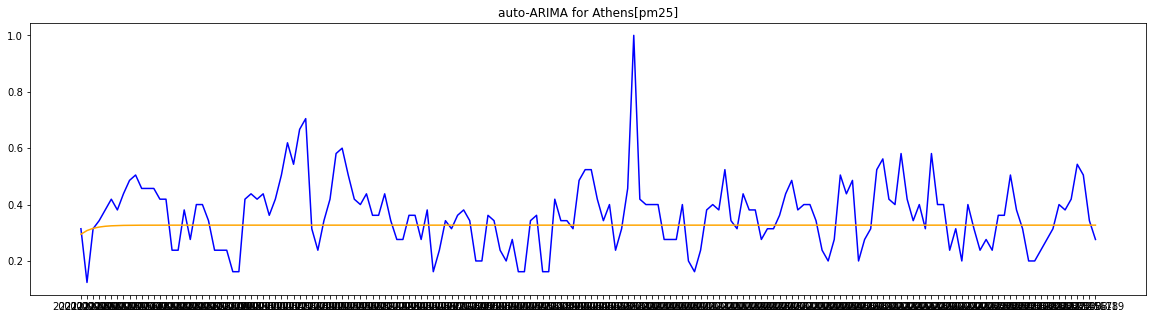

FINDING OPTIMAL PARAMETERS FOR so2
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1518.731, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-975.653, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1470.320, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1283.191, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.059, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1520.427, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1360.187, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1497.699, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1518.645, Time=0.73 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1408.140, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1518.953, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1516.427, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1510.737, Time=0.15 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fi

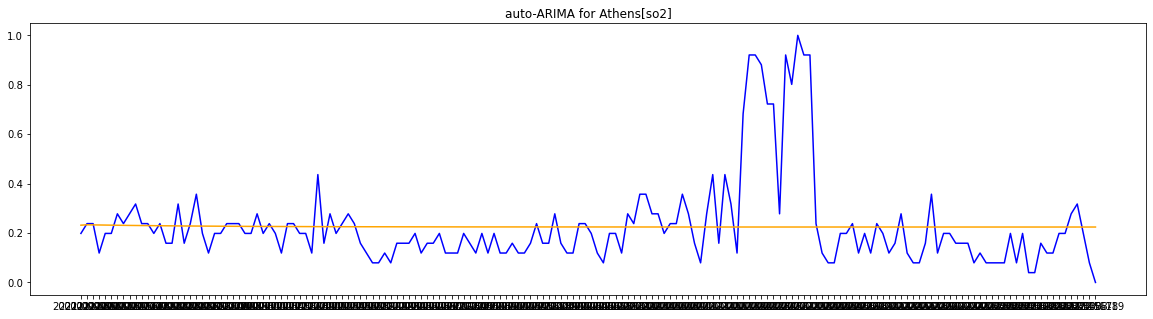

In [6]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
        print("FINDING OPTIMAL PARAMETERS FOR " + str(col))
        if(col=="o3"):
            stationary=False
        else:
            stationary=True
        model = auto_arima(train, trace=True ,error_action='ignore', suppress_warnings=True, seasonal=False, 
                           stationary=stationary)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Athens[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Athens[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Athens[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Athens_Data, "Athens")

# Finding optimal ARIMA parameters manually

In [7]:
#Order of differencing (d) for 'o3', the other pollutants do not need differencing as a result of the dickey
#fully test above
ndiffs(Athens_Data['o3'], test='adf')

1

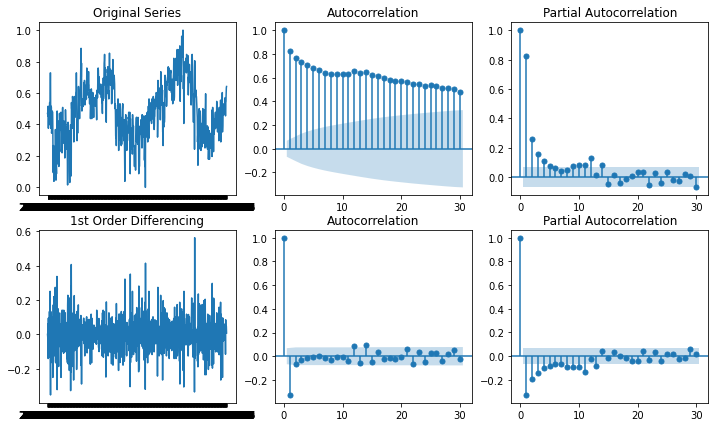

In [8]:
#Ο3
#After checking the results above, the time series that need differencing is Athens_Data['o3'],
#as p-value for o3 : 0.185124> 0.05
plt.rcParams.update({'figure.figsize':(12,7)})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(Athens_Data['o3']); axes[0, 0].set_title('Original Series')
plot_acf(Athens_Data['o3'], ax=axes[0, 1])
plot_pacf(Athens_Data['o3'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(Athens_Data['o3'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Athens_Data['o3'].diff().dropna(), ax=axes[1, 1])
plot_pacf(Athens_Data['o3'].diff().dropna(), ax=axes[1, 2])

plt.show()

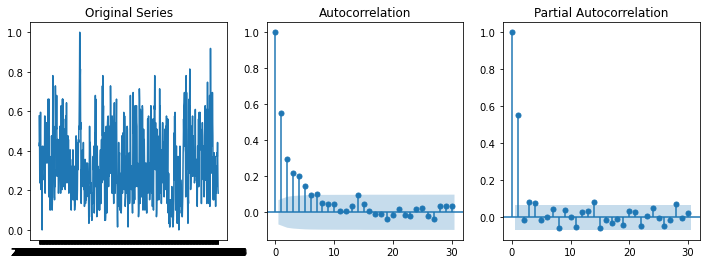

In [9]:
#NO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['no2']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['no2'], ax=axes[1])
plot_pacf(Athens_Data['no2'], ax=axes[2])

plt.show()

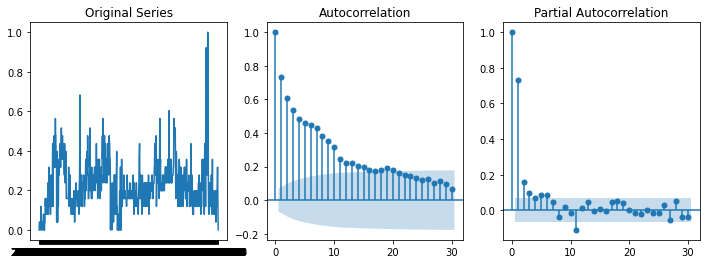

In [10]:
#SO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['so2']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['so2'], ax=axes[1])
plot_pacf(Athens_Data['so2'], ax=axes[2])

plt.show()

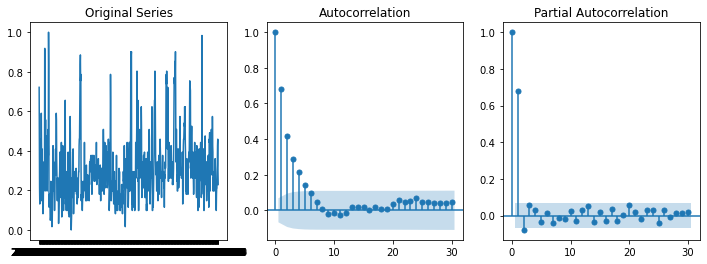

In [11]:
#PM10
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['pm10']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['pm10'], ax=axes[1])
plot_pacf(Athens_Data['pm10'], ax=axes[2])

plt.show()

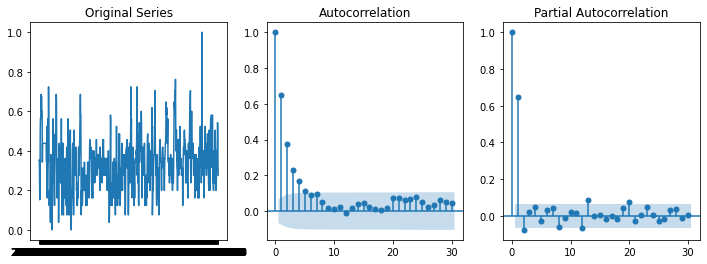

In [12]:
#PM2.5
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['pm25']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['pm25'], ax=axes[1])
plot_pacf(Athens_Data['pm25'], ax=axes[2])

plt.show()

In [13]:
#Για κάθε στήλη φτιάχνονται τα διαγράμματα autocorrelation και partial autocorrelation 
#ώστε να προσδιοριστούν που παράμετροι του Autoregression (p) και Moving Average (q).  
#Το p το βρίσκουμε από το partial autocorrelation plot, μετρώντας πόσα σημεία βρίσκονται 
#εκτός της μπλε σκιασμένης περιοχής. Το q το βρίσκουμε με αντίστοιχο τρόπο από το autocorrelation plot.

### Athens daily predictions

In [5]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    return predictions, test

ARIMA MSE for Athens[O3]:0.0095586081555493
ARIMA RMSE for Athens[O3]:0.09776813466334161
ARIMA MAE for Athens[O3]:0.07366203768836073


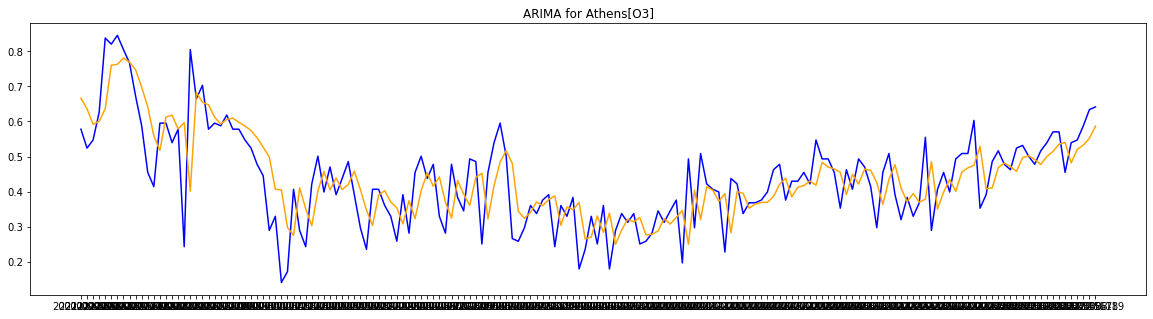

ARIMA MSE for Athens[NO2]:0.024579457755964818
ARIMA RMSE for Athens[NO2]:0.15677837145462642
ARIMA MAE for Athens[NO2]:0.1228925519892945


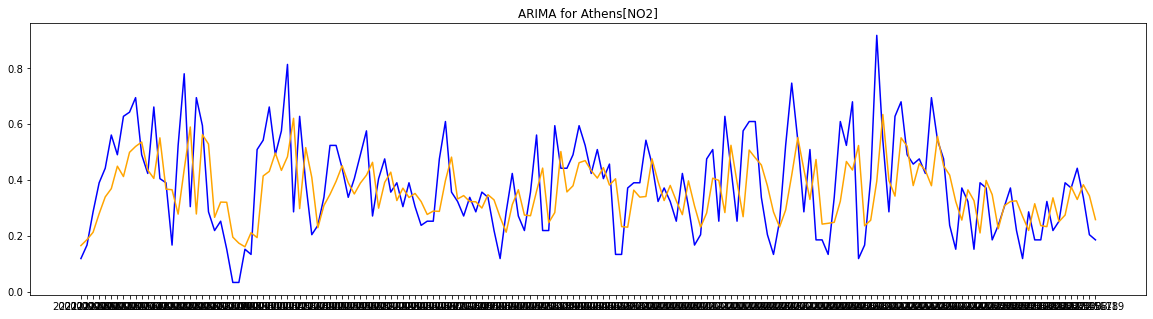

ARIMA MSE for Athens[SO2]:0.015712362008771956
ARIMA RMSE for Athens[SO2]:0.12534896094013687
ARIMA MAE for Athens[SO2]:0.08238138831828519


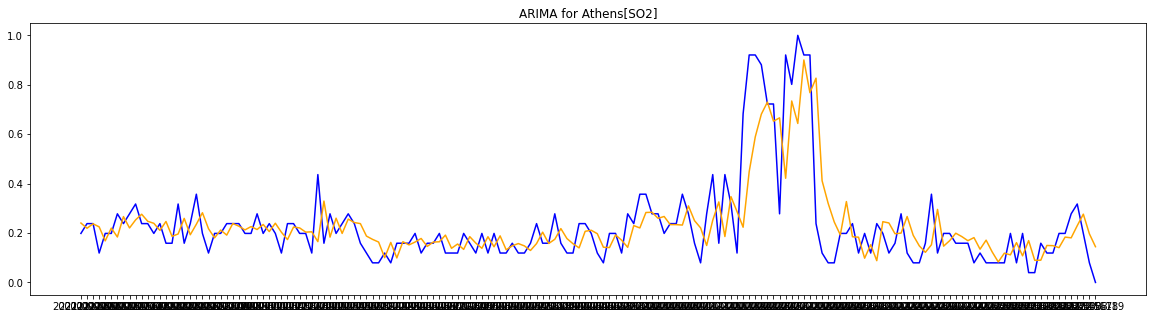

ARIMA MSE for Athens[PM10]:0.013908564366959515
ARIMA RMSE for Athens[PM10]:0.11793457663874286
ARIMA MAE for Athens[PM10]:0.08301585934264356


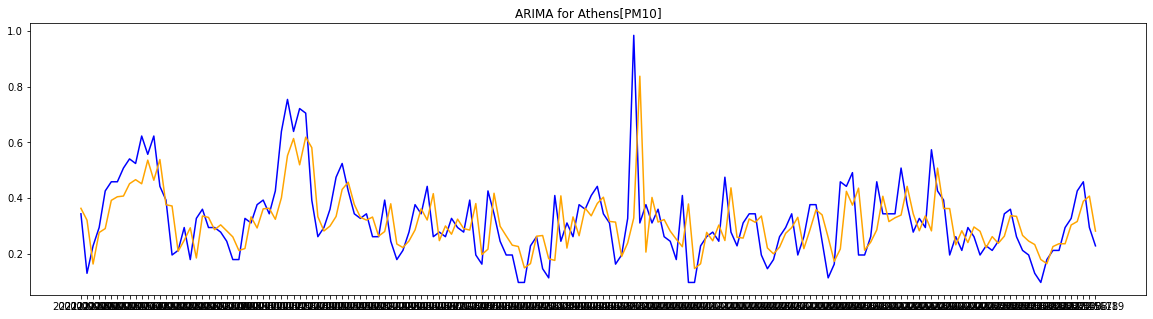

ARIMA MSE for Athens[PM25]:0.01154844897186123
ARIMA RMSE for Athens[PM25]:0.10746371002278504
ARIMA MAE for Athens[PM25]:0.07825162265465564


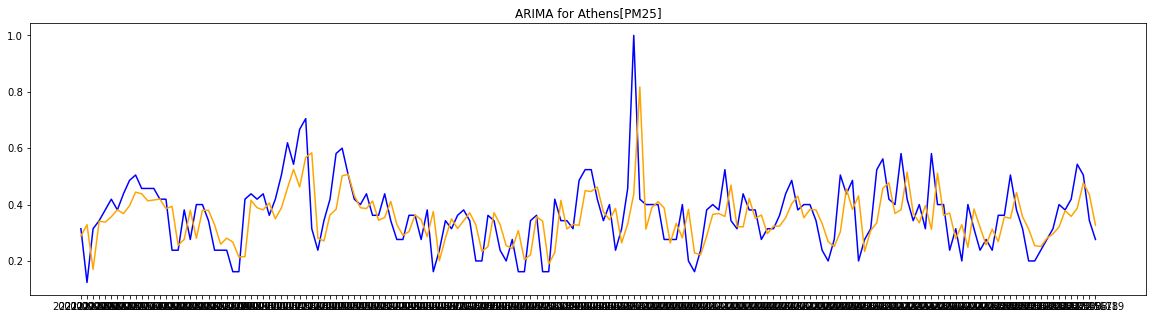

In [15]:
#O3
predictions_o3, test_o3 = manual_ARIMA(Athens_Data['o3'], (2,1,2))
predictions_o3 = pd.Series(predictions_o3)
predictions_o3.index = test_o3.index

print("ARIMA MSE for Athens[O3]:" + str(mean_squared_error(test_o3, predictions_o3)))
print("ARIMA RMSE for Athens[O3]:" + str(math.sqrt(mean_squared_error(test_o3, predictions_o3))))
print("ARIMA MAE for Athens[O3]:" + str(mean_absolute_error(test_o3, predictions_o3)))

title = "ARIMA for Athens[O3]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_o3, label='Actual Data', color='blue')
plt.plot(predictions_o3, label='Predicted Data', color='orange')
plt.show()

#NO2
predictions_no2, test_no2 = manual_ARIMA(Athens_Data['no2'], (2,0,6))
predictions_no2 = pd.Series(predictions_no2)
predictions_no2.index = test_no2.index

print("ARIMA MSE for Athens[NO2]:" + str(mean_squared_error(test_no2, predictions_no2)))
print("ARIMA RMSE for Athens[NO2]:" + str(math.sqrt(mean_squared_error(test_no2, predictions_no2))))
print("ARIMA MAE for Athens[NO2]:" + str(mean_absolute_error(test_no2, predictions_no2)))

title = "ARIMA for Athens[NO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_no2, label='Actual Data', color='blue')
plt.plot(predictions_no2, label='Predicted Data', color='orange')
plt.show()

#SO2
predictions_so2, test_so2 = manual_ARIMA(Athens_Data['so2'], (3,0,11))
predictions_so2 = pd.Series(predictions_so2)
predictions_so2.index = test_so2.index

print("ARIMA MSE for Athens[SO2]:" + str(mean_squared_error(test_so2, predictions_so2)))
print("ARIMA RMSE for Athens[SO2]:" + str(math.sqrt(mean_squared_error(test_so2, predictions_so2))))
print("ARIMA MAE for Athens[SO2]:" + str(mean_absolute_error(test_so2, predictions_so2)))

title = "ARIMA for Athens[SO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_so2, label='Actual Data', color='blue')
plt.plot(predictions_so2, label='Predicted Data', color='orange')
plt.show()

#PM10
predictions_pm10, test_pm10 = manual_ARIMA(Athens_Data['pm10'], (2,0,5))
predictions_pm10 = pd.Series(predictions_pm10)
predictions_pm10.index = test_pm10.index

print("ARIMA MSE for Athens[PM10]:" + str(mean_squared_error(test_pm10, predictions_pm10)))
print("ARIMA RMSE for Athens[PM10]:" + str(math.sqrt(mean_squared_error(test_pm10, predictions_pm10))))
print("ARIMA MAE for Athens[PM10]:" + str(mean_absolute_error(test_pm10, predictions_pm10)))

title = "ARIMA for Athens[PM10]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm10, label='Actual Data', color='blue')
plt.plot(predictions_pm10, label='Predicted Data', color='orange')
plt.show()

#PM25
predictions_pm25, test_pm25 = manual_ARIMA(Athens_Data['pm25'], (2,0,5))
predictions_pm25 = pd.Series(predictions_pm25)
predictions_pm25.index = test_pm25.index

print("ARIMA MSE for Athens[PM25]:" + str(mean_squared_error(test_pm25, predictions_pm25)))
print("ARIMA RMSE for Athens[PM25]:" + str(math.sqrt(mean_squared_error(test_pm25, predictions_pm25))))
print("ARIMA MAE for Athens[PM25]:" + str(mean_absolute_error(test_pm25, predictions_pm25)))

title = "ARIMA for Athens[PM25]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm25, label='Actual Data', color='blue')
plt.plot(predictions_pm25, label='Predicted Data', color='orange')
plt.show()

### Athens weekly predictions

In [6]:
Athens_Data.index = pd.to_datetime(Athens_Data.index)

In [7]:
Athens_weekly = Athens_Data.resample("1w").mean().bfill()

In [23]:
print(ndiffs(Athens_weekly['no2'], test='adf'))
print(ndiffs(Athens_weekly['so2'], test='adf'))
print(ndiffs(Athens_weekly['o3'], test='adf'))
print(ndiffs(Athens_weekly['pm10'], test='adf'))
print(ndiffs(Athens_weekly['pm25'], test='adf'))

0
0
1
0
0


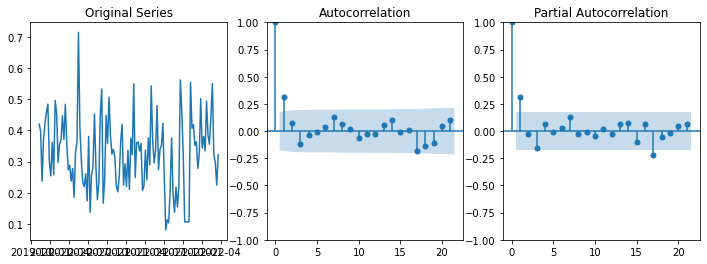

In [24]:
#NO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_weekly['no2']); axes[0].set_title('Original Series')
plot_acf(Athens_weekly['no2'], ax=axes[1])
plot_pacf(Athens_weekly['no2'], ax=axes[2])

plt.show()

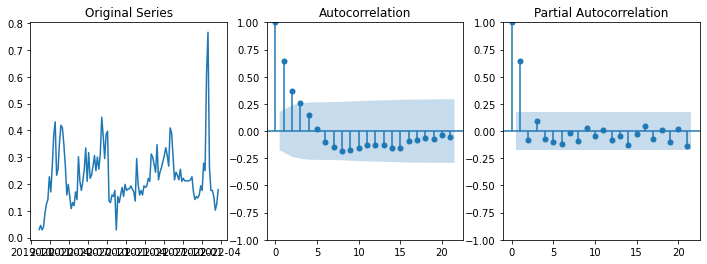

In [25]:
#SO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_weekly['so2']); axes[0].set_title('Original Series')
plot_acf(Athens_weekly['so2'], ax=axes[1])
plot_pacf(Athens_weekly['so2'], ax=axes[2])

plt.show()

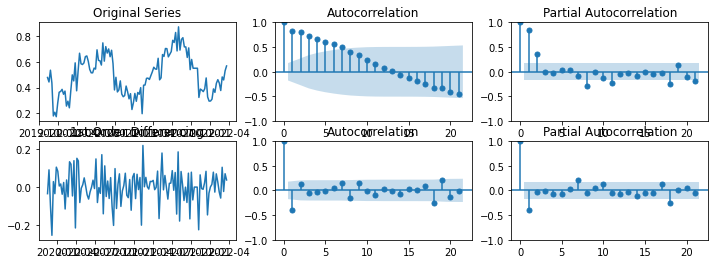

In [33]:
#O3
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0,0].plot(Athens_weekly['o3']); axes[0,0].set_title('Original Series')
plot_acf(Athens_weekly['o3'], ax=axes[0,1])
plot_pacf(Athens_weekly['o3'], ax=axes[0,2])

# 1st Differencing
axes[1, 0].plot(Athens_weekly['o3'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Athens_weekly['o3'].diff().dropna(), ax=axes[1, 1])
plot_pacf(Athens_weekly['o3'].diff().dropna(), ax=axes[1, 2])

plt.show()

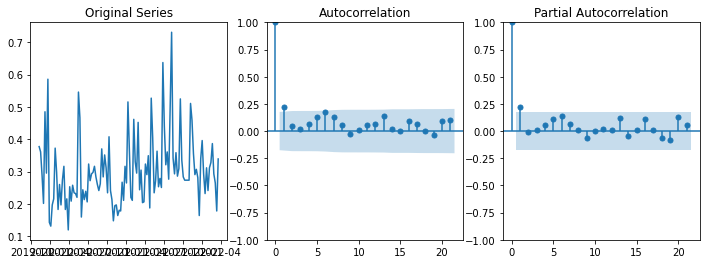

In [35]:
#PM10
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_weekly['pm10']); axes[0].set_title('Original Series')
plot_acf(Athens_weekly['pm10'], ax=axes[1])
plot_pacf(Athens_weekly['pm10'], ax=axes[2])

plt.show()

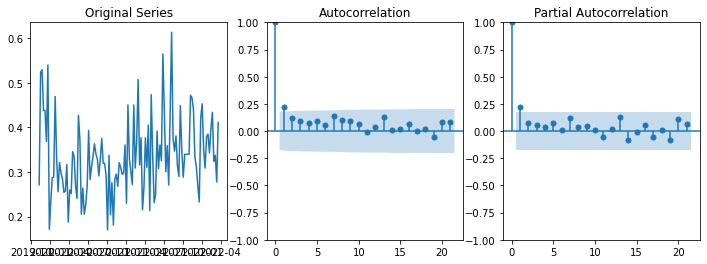

In [32]:
#PM2.5
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_weekly['pm25']); axes[0].set_title('Original Series')
plot_acf(Athens_weekly['pm25'], ax=axes[1])
plot_pacf(Athens_weekly['pm25'], ax=axes[2])

plt.show()

ARIMA MSE for Athens[O3]:0.004906441564469912
ARIMA RMSE for Athens[O3]:0.07004599606308637
ARIMA MAE for Athens[O3]:0.04975594278233996


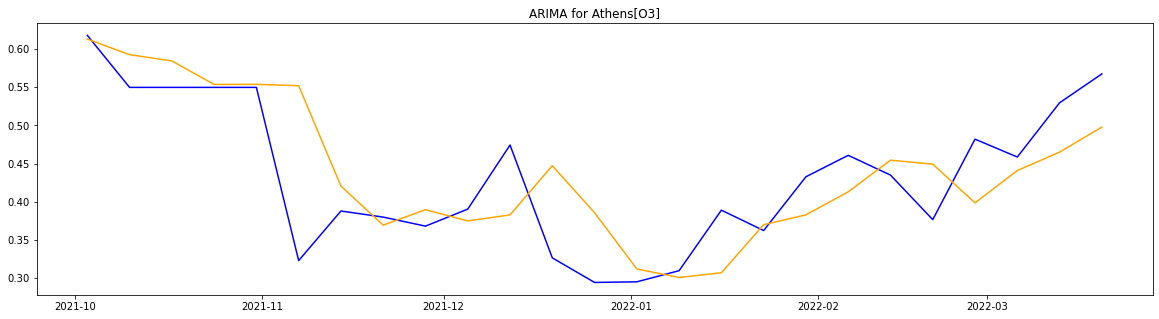

ARIMA MSE for Athens[NO2]:0.01424678691769514
ARIMA RMSE for Athens[NO2]:0.11935990498360469
ARIMA MAE for Athens[NO2]:0.09141802759460382


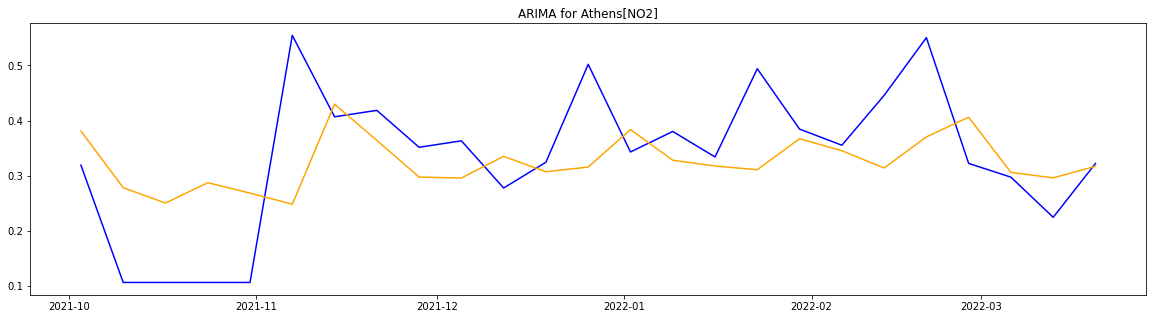

ARIMA MSE for Athens[SO2]:0.01721335253793968
ARIMA RMSE for Athens[SO2]:0.13119966668379796
ARIMA MAE for Athens[SO2]:0.07094573355151793


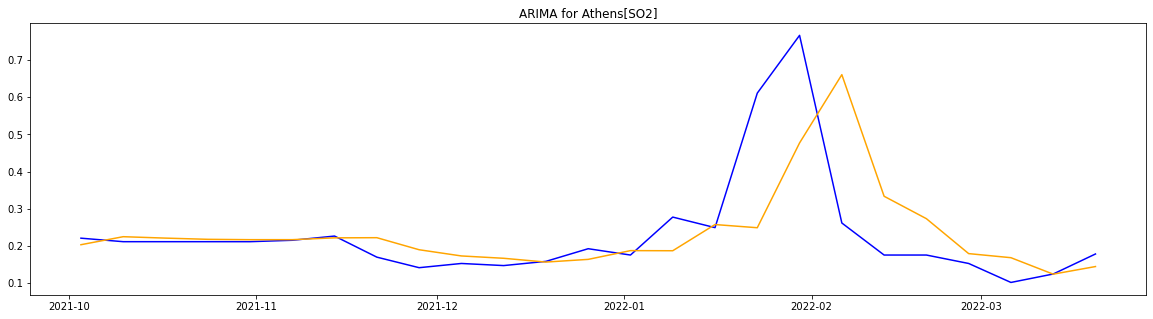

ARIMA MSE for Athens[PM10]:0.005457595218102687
ARIMA RMSE for Athens[PM10]:0.0738755386992385
ARIMA MAE for Athens[PM10]:0.05615413645373644


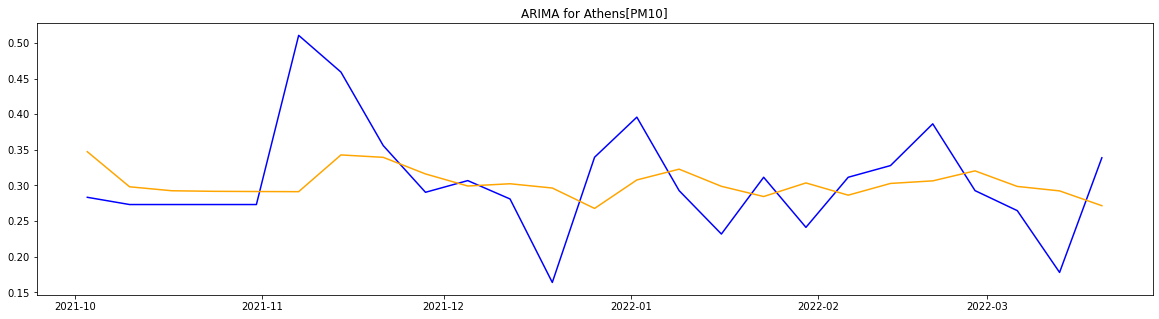

ARIMA MSE for Athens[PM25]:0.004573010103220492
ARIMA RMSE for Athens[PM25]:0.0676240349522305
ARIMA MAE for Athens[PM25]:0.054574264975052064


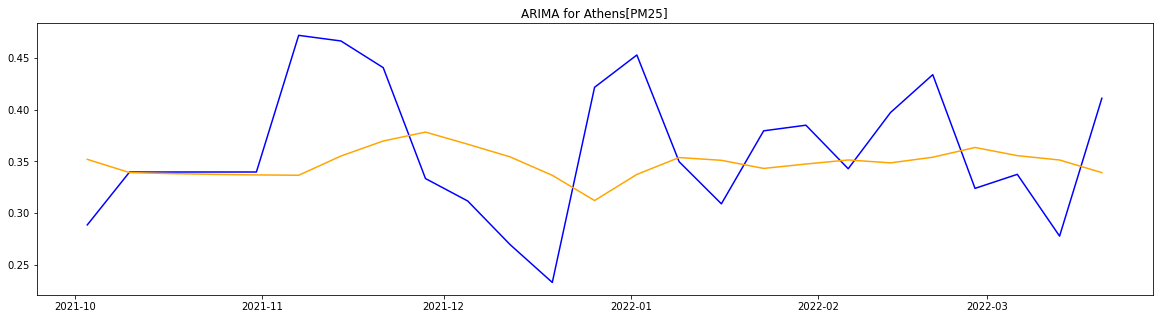

In [37]:
#O3
pred_o3_seasonal, test_o3_seasonal = manual_ARIMA(Athens_weekly['o3'], (2,1,2))
pred_o3_seasonal = pd.Series(pred_o3_seasonal)
pred_o3_seasonal.index = test_o3_seasonal.index

print("ARIMA MSE for Athens[O3]:" + str(mean_squared_error(test_o3_seasonal, pred_o3_seasonal)))
print("ARIMA RMSE for Athens[O3]:" + str(math.sqrt(mean_squared_error(test_o3_seasonal, pred_o3_seasonal))))
print("ARIMA MAE for Athens[O3]:" + str(mean_absolute_error(test_o3_seasonal, pred_o3_seasonal)))

title = "ARIMA for Athens[O3]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_o3_seasonal, label='Actual weekly', color='blue')
plt.plot(pred_o3_seasonal, label='Predicted weekly', color='orange')
plt.show()

#NO2
pred_no2_seasonal, test_no2_seasonal = manual_ARIMA(Athens_weekly['no2'], (2,0,2))
pred_no2_seasonal = pd.Series(pred_no2_seasonal)
pred_no2_seasonal.index = test_no2_seasonal.index

print("ARIMA MSE for Athens[NO2]:" + str(mean_squared_error(test_no2_seasonal, pred_no2_seasonal)))
print("ARIMA RMSE for Athens[NO2]:" + str(math.sqrt(mean_squared_error(test_no2_seasonal, pred_no2_seasonal))))
print("ARIMA MAE for Athens[NO2]:" + str(mean_absolute_error(test_no2_seasonal, pred_no2_seasonal)))

title = "ARIMA for Athens[NO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_no2_seasonal, label='Actual weekly', color='blue')
plt.plot(pred_no2_seasonal, label='Predicted weekly', color='orange')
plt.show()

#SO2
pred_so2_seasonal, test_so2_seasonal = manual_ARIMA(Athens_weekly['so2'], (2,0,3))
pred_so2_seasonal = pd.Series(pred_so2_seasonal)
pred_so2_seasonal.index = test_so2_seasonal.index

print("ARIMA MSE for Athens[SO2]:" + str(mean_squared_error(test_so2_seasonal, pred_so2_seasonal)))
print("ARIMA RMSE for Athens[SO2]:" + str(math.sqrt(mean_squared_error(test_so2_seasonal, pred_so2_seasonal))))
print("ARIMA MAE for Athens[SO2]:" + str(mean_absolute_error(test_so2_seasonal, pred_so2_seasonal)))

title = "ARIMA for Athens[SO2]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_so2_seasonal, label='Actual weekly', color='blue')
plt.plot(pred_so2_seasonal, label='Predicted weekly', color='orange')
plt.show()

#PM10
pred_pm10_seasonal, test_pm10_seasonal = manual_ARIMA(Athens_weekly['pm10'], (1,0,1))
pred_pm10_seasonal = pd.Series(pred_pm10_seasonal)
pred_pm10_seasonal.index = test_pm10_seasonal.index

print("ARIMA MSE for Athens[PM10]:" + str(mean_squared_error(test_pm10_seasonal, pred_pm10_seasonal)))
print("ARIMA RMSE for Athens[PM10]:" + str(math.sqrt(mean_squared_error(test_pm10_seasonal, pred_pm10_seasonal))))
print("ARIMA MAE for Athens[PM10]:" + str(mean_absolute_error(test_pm10_seasonal, pred_pm10_seasonal)))

title = "ARIMA for Athens[PM10]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm10_seasonal, label='Actual weekly', color='blue')
plt.plot(pred_pm10_seasonal, label='Predicted weekly', color='orange')
plt.show()

#PM25
pred_pm25_seasonal, test_pm25_seasonal = manual_ARIMA(Athens_weekly['pm25'], (1,0,1))
pred_pm25_seasonal = pd.Series(pred_pm25_seasonal)
pred_pm25_seasonal.index = test_pm25_seasonal.index

print("ARIMA MSE for Athens[PM25]:" + str(mean_squared_error(test_pm25_seasonal, pred_pm25_seasonal)))
print("ARIMA RMSE for Athens[PM25]:" + str(math.sqrt(mean_squared_error(test_pm25_seasonal, pred_pm25_seasonal))))
print("ARIMA MAE for Athens[PM25]:" + str(mean_absolute_error(test_pm25_seasonal, pred_pm25_seasonal)))

title = "ARIMA for Athens[PM25]"
plt.figure(figsize=(20, 5))
plt.title(title)
plt.plot(test_pm25_seasonal, label='Actual weekly', color='blue')
plt.plot(pred_pm25_seasonal, label='Predicted weekly', color='orange')
plt.show()

### Athens monthly data

In [38]:
Athens_Data.index = pd.to_datetime(Athens_Data.index)
Athens_monthly = Athens_Data.resample("1m").mean().bfill()

In [39]:
print(ndiffs(Athens_monthly['no2'], test='adf'))
print(ndiffs(Athens_monthly['so2'], test='adf'))
print(ndiffs(Athens_monthly['o3'], test='adf'))
print(ndiffs(Athens_monthly['pm10'], test='adf'))
print(ndiffs(Athens_monthly['pm25'], test='adf'))

2
1
2
1
0


In [42]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = range(0,3)
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Athens " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Athens " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Athens "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Athens" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return forecast, test

In [43]:
#O3
arima_grid_search(Athens_monthly['o3'], 'o3')
#NO2
arima_grid_search(Athens_monthly['no2'], 'no2')
#SO2
arima_grid_search(Athens_monthly['so2'], 'so2')
#PM10
arima_grid_search(Athens_monthly['pm10'], 'pm10')
#PM25
arima_grid_search(Athens_monthly['pm25'], 'pm25')

LinAlgError: Schur decomposition solver error.

### Comparison of monthly data and predicted data

In [19]:
Athens_Data.index = pd.to_datetime(Athens_Data.index)

In [20]:
Athens_monthly = Athens_Data.resample("1m").mean().bfill()

In [24]:
predictions_o3.index = pd.to_datetime(predictions_o3.index)
predictions_no2.index = pd.to_datetime(predictions_no2.index)
predictions_so2.index = pd.to_datetime(predictions_so2.index)
predictions_pm10.index = pd.to_datetime(predictions_pm10.index)
predictions_pm25.index = pd.to_datetime(predictions_pm25.index)

In [25]:
test_o3.index = pd.to_datetime(test_o3.index)
test_no2.index = pd.to_datetime(test_no2.index)
test_so2.index = pd.to_datetime(test_so2.index)
test_pm10.index = pd.to_datetime(test_pm10.index)
test_pm25.index = pd.to_datetime(test_pm25.index)

In [28]:
preds_monthly = [predictions_o3.resample("1m").mean().bfill(), predictions_no2.resample("1m").mean().bfill(), 
                 predictions_so2.resample("1m").mean().bfill(), predictions_pm10.resample("1m").mean().bfill(),
                 predictions_pm25.resample("1m").mean().bfill()]
test_monthly = [test_o3.resample("1m").mean().bfill(), test_no2.resample("1m").mean().bfill(), test_so2.resample("1m").mean().bfill(),
                test_pm10.resample("1m").mean().bfill(), test_pm25.resample("1m").mean().bfill()]

In [31]:
print("O3\n")
print("ARIMA MSE for Athens[O3]:" + str(mean_squared_error(test_monthly[0], preds_monthly[0])))
print("ARIMA RMSE for Athens[O3]:" + str(math.sqrt(mean_squared_error(test_monthly[0], preds_monthly[0]))))
print("ARIMA MAE for Athens[O3]:" + str(mean_absolute_error(test_monthly[0], preds_monthly[0])))
print("\n")

print("NO2\n")
print("ARIMA MSE for Athens[NO2]:" + str(mean_squared_error(test_monthly[1], preds_monthly[1])))
print("ARIMA RMSE for Athens[NO2]:" + str(math.sqrt(mean_squared_error(test_monthly[1], preds_monthly[1]))))
print("ARIMA MAE for Athens[NO2]:" + str(mean_absolute_error(test_monthly[1], preds_monthly[1])))
print("\n")

print("SO2\n")
print("ARIMA MSE for Athens[SO2]:" + str(mean_squared_error(test_monthly[2], preds_monthly[2])))
print("ARIMA RMSE for Athens[SO2]:" + str(math.sqrt(mean_squared_error(test_monthly[2], preds_monthly[2]))))
print("ARIMA MAE for Athens[SO2]:" + str(mean_absolute_error(test_monthly[2], preds_monthly[2])))
print("\n")

print("PM10\n")
print("ARIMA MSE for Athens[PM10]:" + str(mean_squared_error(test_monthly[3], preds_monthly[3])))
print("ARIMA RMSE for Athens[PM10]:" + str(math.sqrt(mean_squared_error(test_monthly[3], preds_monthly[3]))))
print("ARIMA MAE for Athens[PM10]:" + str(mean_absolute_error(test_monthly[3], preds_monthly[3])))
print("\n")

print("PM25\n")
print("ARIMA MSE for Athens[PM25]:" + str(mean_squared_error(test_monthly[4], preds_monthly[4])))
print("ARIMA RMSE for Athens[PM25]:" + str(math.sqrt(mean_squared_error(test_monthly[4], preds_monthly[4]))))
print("ARIMA MAE for Athens[PM25]:" + str(mean_absolute_error(test_monthly[4], preds_monthly[4])))

O3

ARIMA MSE for Athens[O3]:0.0003749937905697175
ARIMA RMSE for Athens[O3]:0.019364756403572898
ARIMA MAE for Athens[O3]:0.017849724285214672


NO2

ARIMA MSE for Athens[NO2]:0.0026822865921990223
ARIMA RMSE for Athens[NO2]:0.05179079640437114
ARIMA MAE for Athens[NO2]:0.043775030440529286


SO2

ARIMA MSE for Athens[SO2]:0.0015983297805094272
ARIMA RMSE for Athens[SO2]:0.039979116805019935
ARIMA MAE for Athens[SO2]:0.025874542912352916


PM10

ARIMA MSE for Athens[PM10]:0.0002652867264254176
ARIMA RMSE for Athens[PM10]:0.0162876249473463
ARIMA MAE for Athens[PM10]:0.013332167314300949


PM25

ARIMA MSE for Athens[PM25]:0.00015149514461667633
ARIMA RMSE for Athens[PM25]:0.012308336387045827
ARIMA MAE for Athens[PM25]:0.009599091453012734
